In [1]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd
A = gpd.read_file('data/Chicago/Boundaries - Community Areas (current).zip')

In [3]:
column_names = ['POP_DENS','VAC_HU','HH_SIZE']
model_name = 'hawkes'
model = Point_Process_Model('data/Chicago/Crime_Incident_Reports/sr_2022_xyt.csv',
                            A,model=model_name,
                            #spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(1,10), alpha = dist.Beta(5,15), sigmax_2 = dist.HalfNormal(0.1),
                            w=dist.Normal(np.zeros(3),np.ones(3)/10)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026
/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:216: UserWarning: "w" prior is not being used. There is no such parameter in the model.
  warnings.warn(f'\"{par}\" prior is not being used. There is no such parameter in th

In [92]:
column_names = ['POP_DENS','VAC_HU','HH_SIZE']
model_name = 'cox_hawkes'
old_model = Point_Process_Model('data/Chicago/Crime_Incident_Reports/sr_2022_xyt.csv',
                            A,model=model_name,
                            #spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(1,5), alpha = dist.Beta(2,8), sigmax_2 = dist.HalfNormal(0.1)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:80: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [69]:
import dill
with open('output/Chicago_Shootings/cox_hawkes/output.pkl','rb') as f:
    ouput = dill.load(f)

In [70]:
old_model.mcmc_samples = ouput['samples']

## SVI Results

100%|████████████████| 10000/10000 [04:28<00:00, 37.22it/s, init loss: -14750.6748, avg. loss [9501-10000]: -17809.6836]


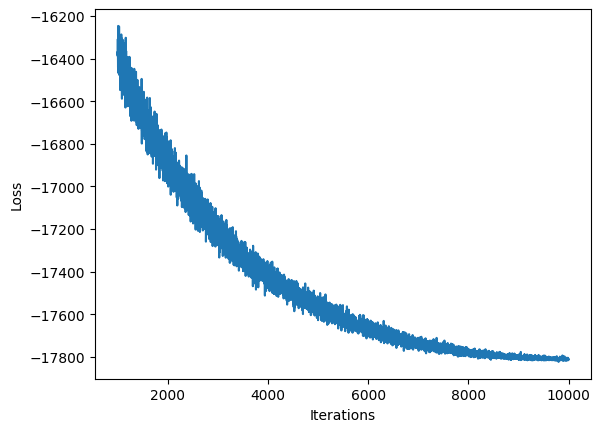

In [5]:
from numpyro.infer import init_to_median, init_to_value, init_to_uniform
model.run_svi(num_steps=15000,lr=0.002,resume=False)

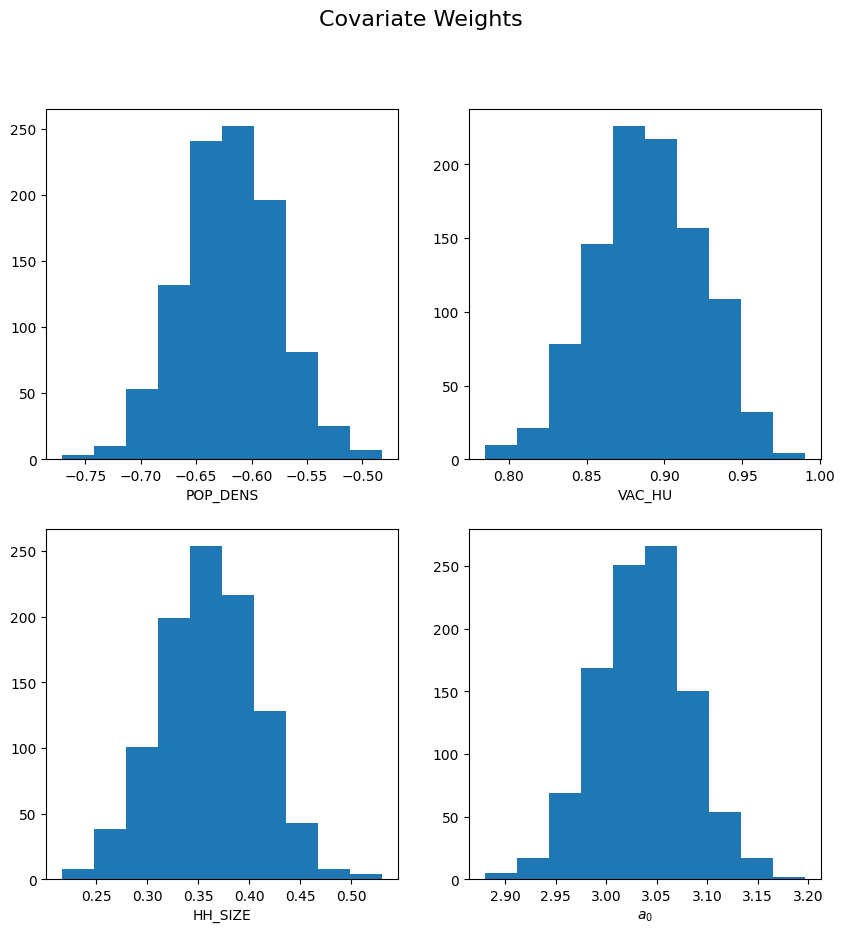

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
POP_DENS,-0.619744,0.042607,-14.545459,0.000000e+00,-0.698848,-0.536971
VAC_HU,0.889598,0.034426,25.840708,0.000000e+00,0.823012,0.952136
HH_SIZE,0.361179,0.047378,7.623426,2.475797e-14,0.269176,0.452929
a_0,3.036171,0.045859,66.207146,0.000000e+00,2.944908,3.126458


In [8]:
model.cov_weight_post_summary()

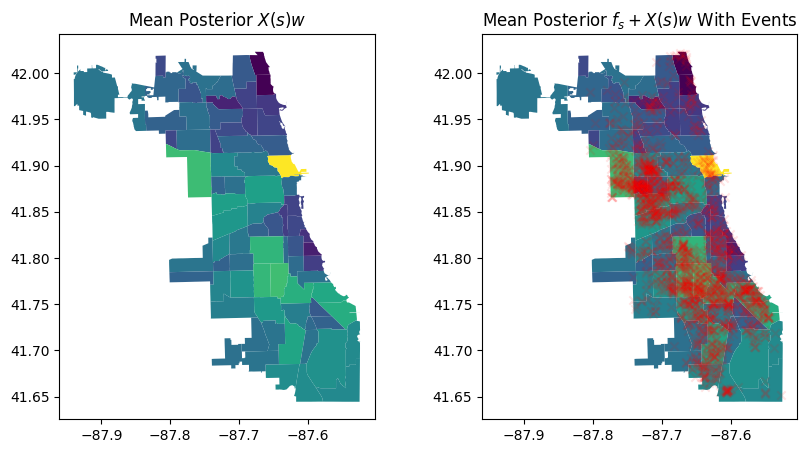

In [9]:
model.plot_spatial_background(include_cov=True)

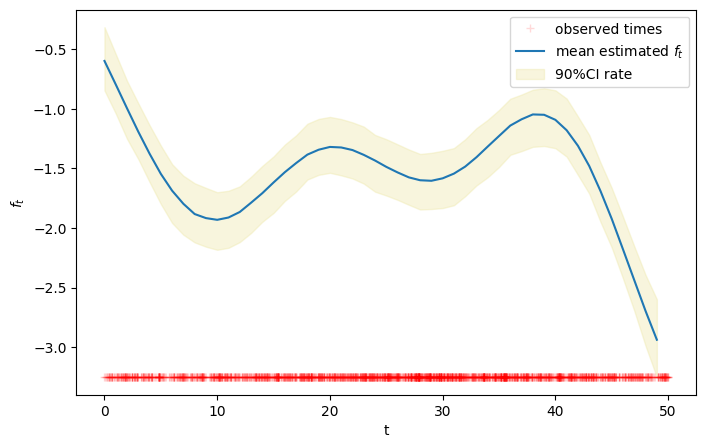

In [18]:
model.plot_temporal_background()

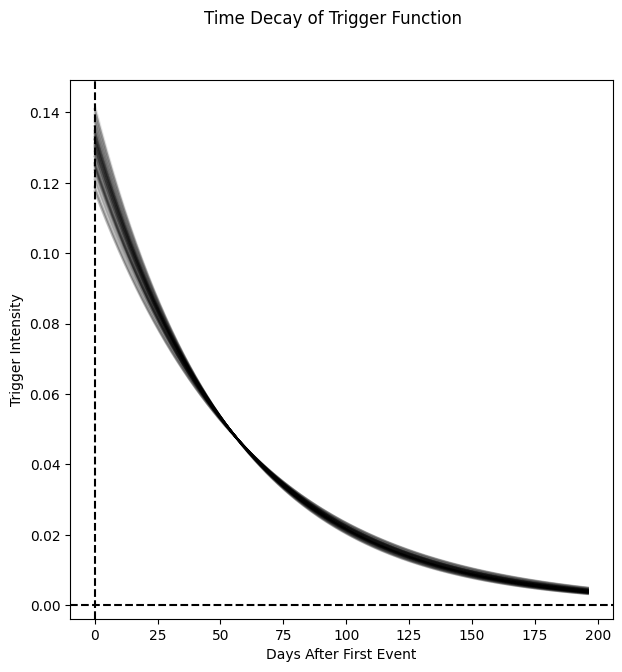

Mean trigger time: 56.02 days


In [6]:
model.plot_trigger_time_decay()

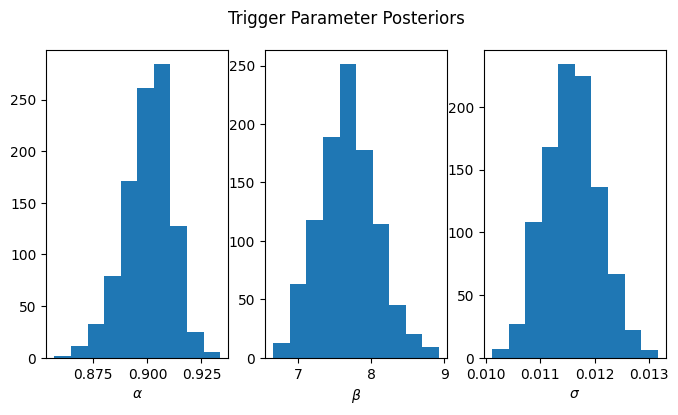

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.900391,0.010972,82.063683,0.0,0.876038,0.918985
beta,7.683248,0.385650,19.922878,0.0,6.975974,8.496043
sigma,0.011583,0.000494,23.424318,0.0,0.010671,0.012569


In [7]:
model.plot_trigger_posterior()

In [8]:
model.mcmc_samples['sigmax_2'].mean()**0.5*.6*110

DeviceArray(0.7651586, dtype=float32)

In [25]:
model.mcmc_samples['z_spatial'].mean(axis=0)

DeviceArray([-5.505334  , -0.1987165 ,  2.2345946 ,  0.42636377,
             -2.9685752 , -2.2846956 , -0.3233258 ,  2.7904239 ,
             -4.09294   ,  0.09352048,  2.8076427 ,  4.458406  ,
              2.248715  ,  0.00660817,  3.8805592 ], dtype=float32)

## MCMC Results

In [4]:
#import numpyro
#numpyro.set_host_device_count(3)
model.run_mcmc(num_warmup=1000,num_chains=1)

sample: 100%|█████████████████████████| 2000/2000 [5:41:38<00:00, 10.25s/it, 255 steps of size 1.06e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0    -15.52      1.68    -15.47    -18.24    -12.86    413.35      1.00
         alpha      0.91      0.03      0.91      0.87      0.95   1273.11      1.00
          beta     15.87      1.10     15.80     14.08     17.61    839.07      1.00
      sigmax_2      0.00      0.00      0.00      0.00      0.00    580.19      1.00
  z_spatial[0]     -0.56      0.11     -0.56     -0.73     -0.39    453.82      1.00
  z_spatial[1]      0.53      0.14      0.53      0.28      0.75    431.25      1.00
  z_spatial[2]     -0.96      0.19     -0.97     -1.26     -0.64    445.81      1.00
  z_spatial[3]     -1.93      0.22     -1.93     -2.28     -1.57    389.80      1.00
  z_spatial[4]     -0.21      0.18     -0.21     -0.49      0.07    528.98      1.00
  z_spatial[5]      0.09      0.11      0.09     -0.09      0.26    515.48      1.00
  z_spatial[6]      0.31      0.20      0.31     -0.03      0.64

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:501: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  intersect = gpd.overlay(self.comp_grid, self.A[['geometry']], how='intersection')


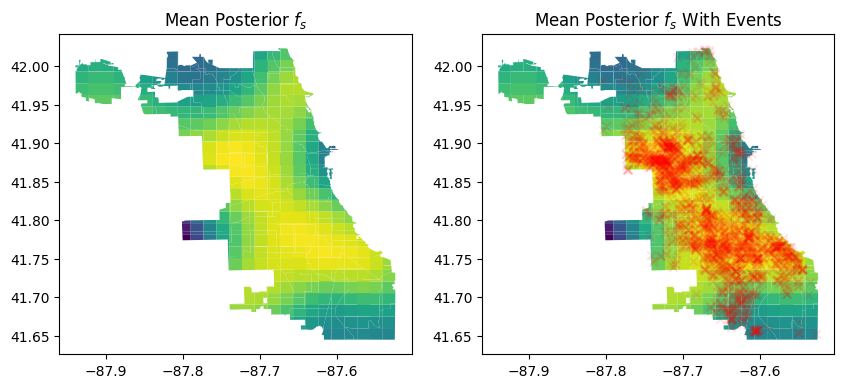

In [9]:
model.plot_spatial_background(include_cov=False)

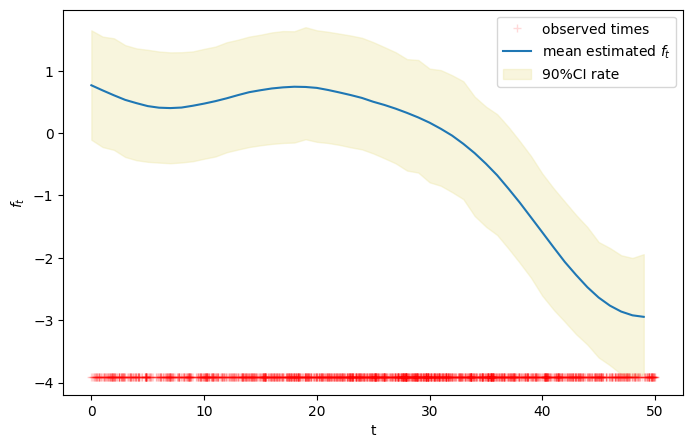

In [17]:
model.plot_temporal_background()

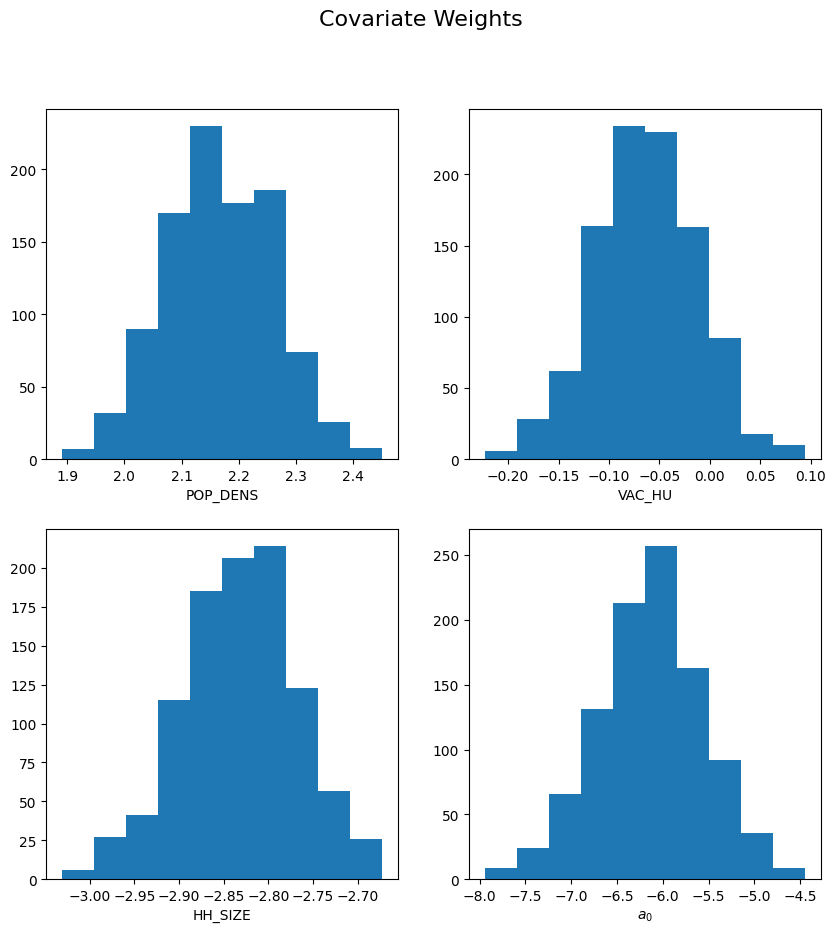

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
POP_DENS,2.167948,0.094825,22.862608,0.000000,1.989814,2.350165
VAC_HU,-0.062866,0.051447,-1.221938,0.221731,-0.163786,0.033729
HH_SIZE,-2.831886,0.063915,-44.307373,0.000000,-2.964856,-2.707921
a_0,-6.130668,0.578547,-10.596660,0.000000,-7.325783,-4.950991


In [67]:
model.cov_weight_post_summary()

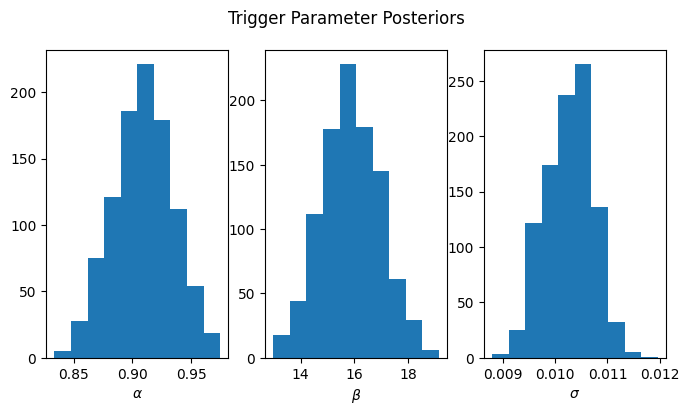

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.909119,0.025481,35.678703,0.0,0.858621,0.959603
beta,15.868416,1.095039,14.491181,0.0,13.724214,18.159210
sigma,0.010264,0.000455,22.570568,0.0,0.009374,0.011074


In [11]:
model.plot_trigger_posterior()

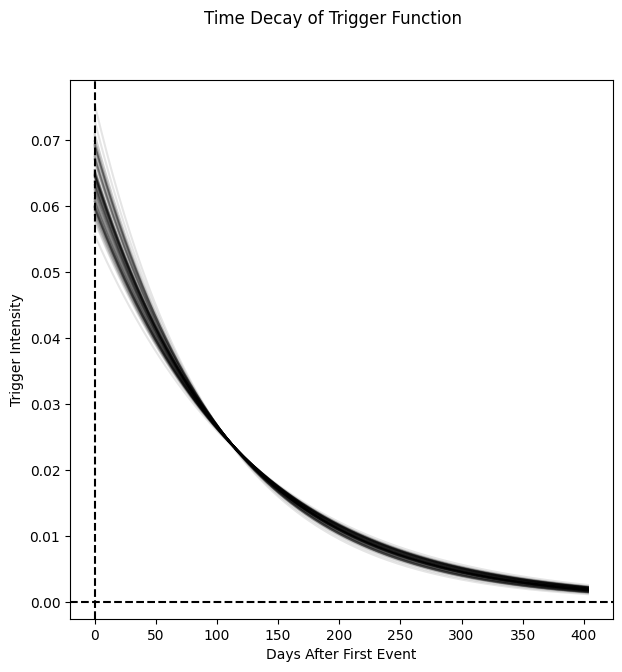

Mean trigger time: 115.7 days


In [12]:
model.plot_trigger_time_decay()

In [14]:
model.mcmc_samples['sigmax_2'].mean()**0.5*.6*110

DeviceArray(0.6780996, dtype=float32)

In [52]:
old_model.mcmc_samples['beta'] = 1/old_model.mcmc_samples['beta']

## ShotSpotter Results

In [27]:
column_names = ['POP_DENS','VAC_HU','HH_SIZE']
model_name = 'lgcp'
ss_mod = Point_Process_Model('data/Chicago/ShotSpotter/ss_2022_xyt.csv',
                            A,model=model_name,
                            spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(1,5), alpha = dist.Beta(1,1)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:78: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026
/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:194: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this

### SVI Results

100%|█████████████| 50000/50000 [01:01<00:00, 810.85it/s, init loss: -22057.4258, avg. loss [47501-50000]: -518729.7188]



SVI elapsed time: 73.24894642829895


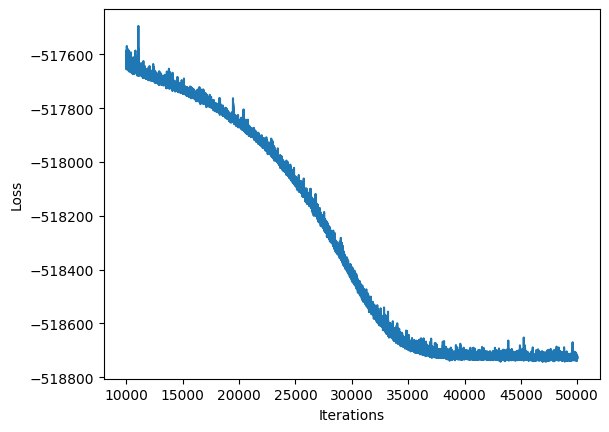

In [39]:
from numpyro.infer import init_to_median, init_to_value, init_to_uniform
ss_mod.run_svi(num_steps=50000,lr=0.005,init_strategy=init_to_uniform)

In [40]:
(np.exp(ss_mod.mcmc_samples['scale'])).mean()

25.529844

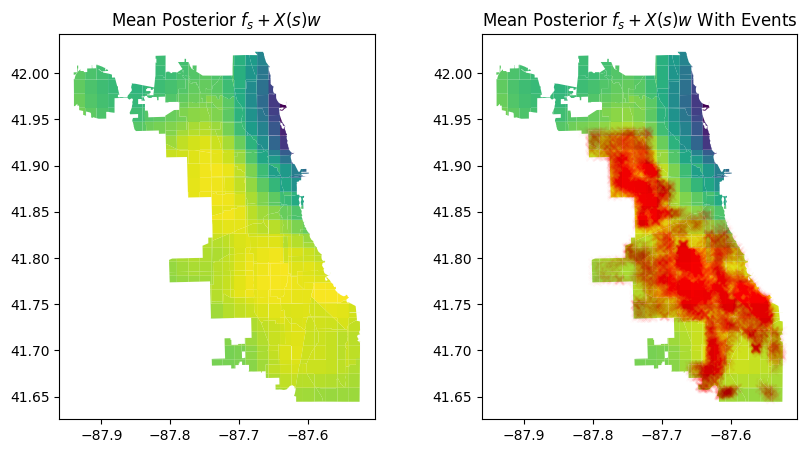

In [41]:
ss_mod.plot_spatial_background(alpha=0.01,include_cov=True)

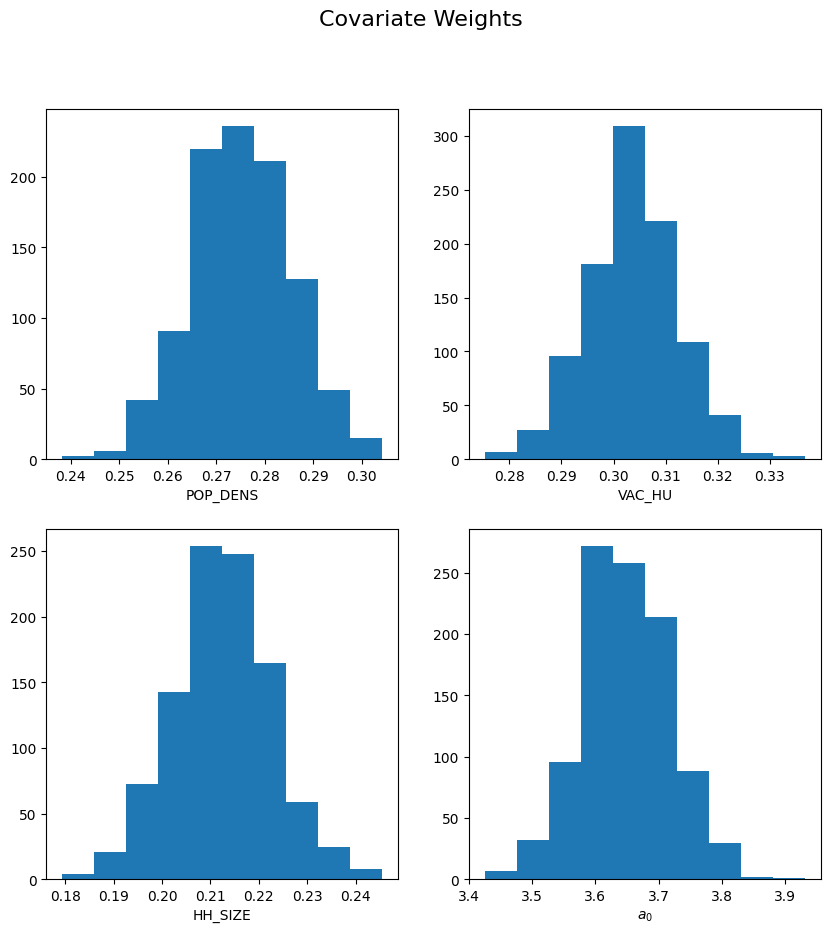

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
POP_DENS,0.275364,0.010349,26.609087,0.0,0.255803,0.295338
VAC_HU,0.303745,0.008765,34.654545,0.0,0.286399,0.320949
HH_SIZE,0.212642,0.010202,20.842579,0.0,0.192596,0.233636
a_0,3.648959,0.070026,52.108517,0.0,3.511572,3.790881


In [42]:
ss_mod.cov_weight_post_summary()

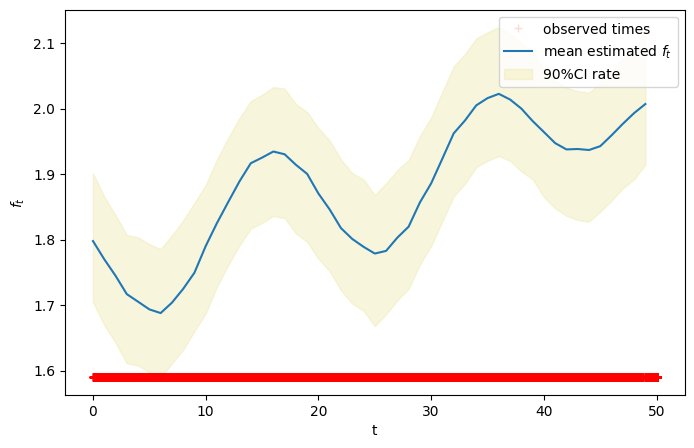

In [43]:
ss_mod.plot_temporal_background()

### MCMC Results

In [10]:
ss_mod.run_mcmc()

sample: 100%|██████████████████████████| 1500/1500 [05:22<00:00,  4.65it/s, 1023 steps of size 3.11e-03. acc. prob=0.92]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0      7.68      0.43      7.70      7.03      8.44    114.90      1.03
         scale      6.46      0.03      6.46      6.40      6.51    433.99      1.00
          w[0]      0.27      0.01      0.27      0.25      0.29    775.46      1.00
          w[1]      0.31      0.01      0.31      0.29      0.32    991.11      1.00
          w[2]      0.23      0.01      0.23      0.21      0.24    664.83      1.00
  z_spatial[0]      0.12      0.04      0.12      0.06      0.18     66.43      1.00
  z_spatial[1]      2.08      0.17      2.08      1.82      2.37     65.08      1.00
  z_spatial[2]     -0.13      0.02     -0.13     -0.17     -0.10     65.70      1.00
  z_spatial[3]      0.14      0.02      0.14      0.12      0.17    307.26      1.00
  z_spatial[4]      1.48      0.08      1.48      1.36      1.63     67.86      1.00
  z_spatial[5]     -0.51      0.04     -0.51     -0.59     -0.45

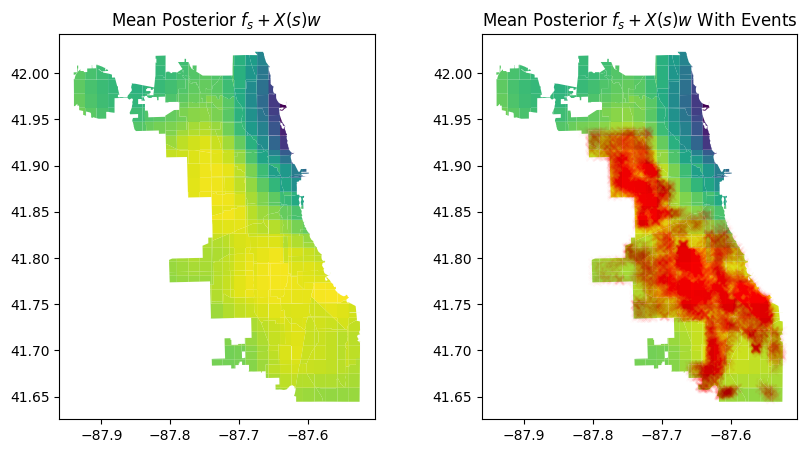

In [13]:
ss_mod.plot_spatial_background(alpha=0.01,include_cov=True)

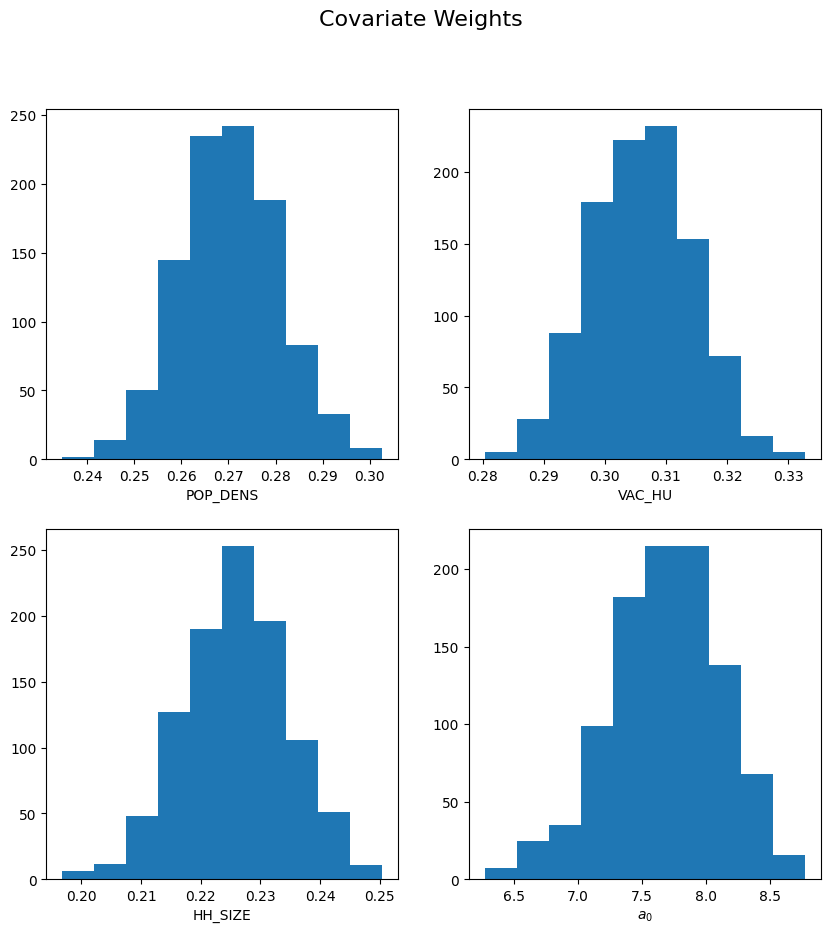

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
POP_DENS,0.270330,0.010486,25.779121,0.0,0.251202,0.292155
VAC_HU,0.306021,0.008370,36.561749,0.0,0.289961,0.321770
HH_SIZE,0.225911,0.008793,25.690805,0.0,0.208978,0.242395
a_0,7.683185,0.434649,17.676737,0.0,6.718726,8.478019


In [14]:
ss_mod.cov_weight_post_summary()

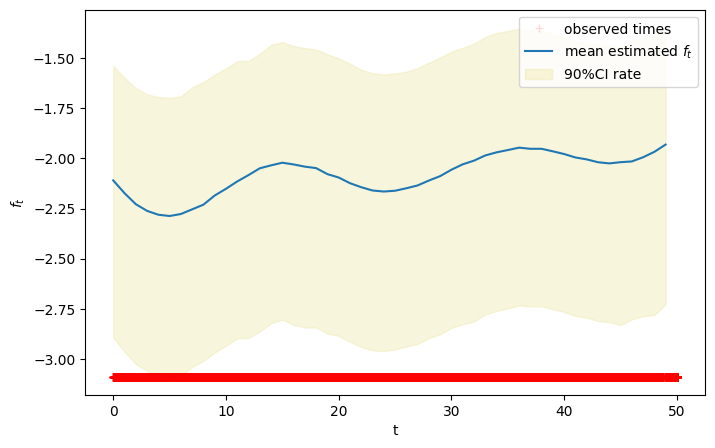

In [15]:
ss_mod.plot_temporal_background()

In [16]:
ss_mod.mcmc_samples['a_0'].mean()

DeviceArray(7.683186, dtype=float32)

## Boko Haram

In [26]:
A = np.array([[3,15.5],[4,16.5]])
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
model_name = 'lgcp'
model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            spatial_cov='data/inc_spatial_cov.csv',cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(0,5)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:194: UserWarning: `keep_geom_type=True` in overlay resulted in 4466 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(comp_grid, spatial_cov, how='intersection')


100%|████████████████| 10000/10000 [00:12<00:00, 785.15it/s, init loss: -3819.0354, avg. loss [9501-10000]: -29366.7871]



SVI elapsed time: 16.06929326057434


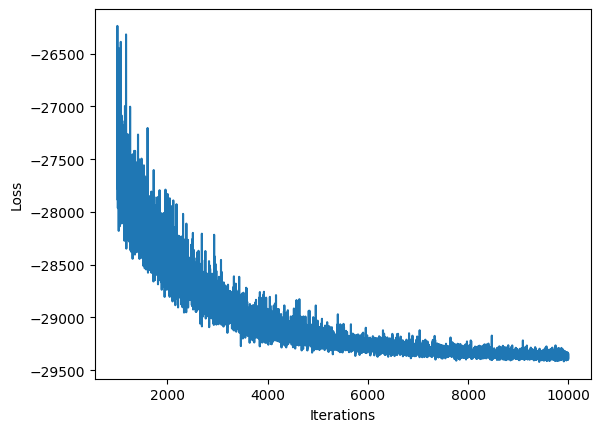

In [28]:
model.run_svi(num_steps=10000,resume=False)

In [32]:
model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:33<00:00, 44.18it/s, 767 steps of size 1.17e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -9.93      0.89     -9.96    -11.20     -8.30    367.39      1.00
          w[0]      0.03      0.11      0.03     -0.16      0.20    801.04      1.00
          w[1]     -0.05      0.04     -0.05     -0.12      0.02    617.16      1.00
          w[2]      0.11      0.03      0.11      0.07      0.16    892.47      1.00
          w[3]     -0.01      0.08     -0.01     -0.14      0.12    632.71      1.00
          w[4]      0.95      0.10      0.95      0.80      1.11    540.07      1.00
          w[5]      0.10      0.03      0.10      0.05      0.16    877.96      1.00
          w[6]      0.71      0.04      0.71      0.65      0.77    690.04      1.00
          w[7]     -0.20      0.04     -0.20     -0.27     -0.12    875.64      1.00
          w[8]      0.88      0.08      0.89      0.77      1.01    919.52      1.00
          w[9]      0.42      0.04      0.42      0.35      0.49

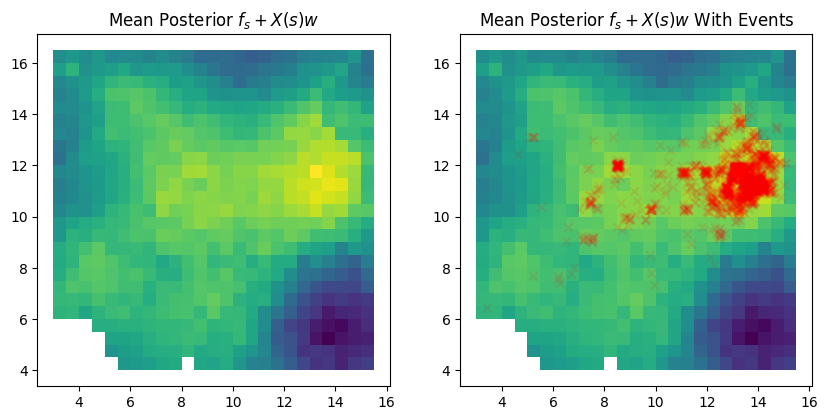

In [33]:
model.plot_spatial_background(include_cov=True)

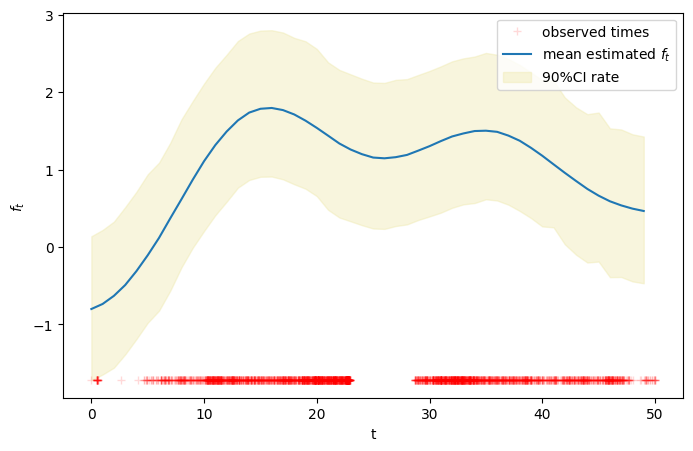

In [36]:
model.plot_temporal_background()

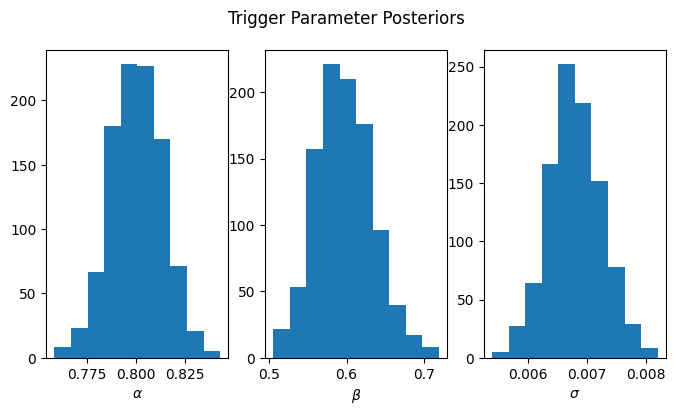

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.800572,0.013431,59.604477,0.0,0.773272,0.826112
beta,0.597598,0.036725,16.272049,0.0,0.528369,0.675861
sigma,0.006808,0.000452,15.067015,0.0,0.005914,0.007684


In [24]:
model.plot_trigger_posterior()

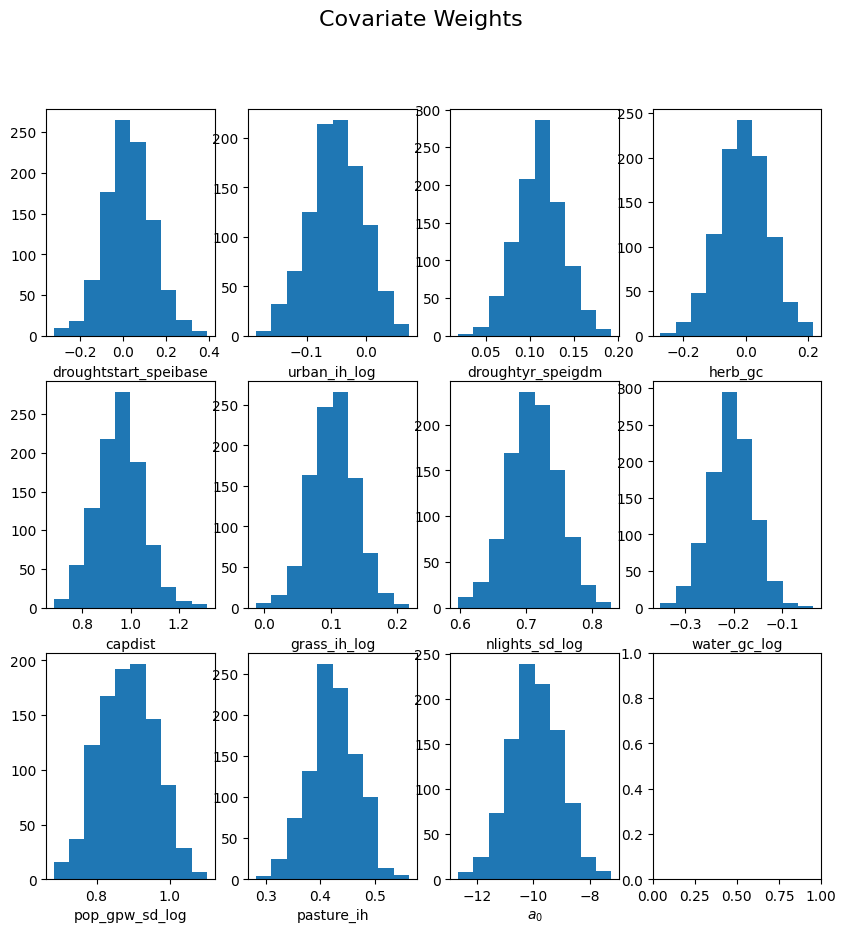

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,0.027320,0.108809,0.251080,0.801752,-0.181128,0.247887
urban_ih_log,-0.049662,0.044967,-1.104407,0.269417,-0.137998,0.035806
droughtyr_speigdm,0.111286,0.026483,4.202104,0.000026,0.060337,0.164000
herb_gc,-0.006917,0.079730,-0.086760,0.930863,-0.164497,0.152609
capdist,0.953605,0.095844,9.949590,0.000000,0.765570,1.145085
grass_ih_log,0.103546,0.033884,3.055851,0.002244,0.036996,0.170560
nlights_sd_log,0.710998,0.038175,18.624752,0.000000,0.637833,0.783807
water_gc_log,-0.204896,0.044464,-4.608134,0.000004,-0.294080,-0.121401
pop_gpw_sd_log,0.884472,0.075550,11.707147,0.000000,0.740764,1.025167
pasture_ih,0.423613,0.044152,9.594456,0.000000,0.335430,0.505396


In [34]:
model.cov_weight_post_summary()

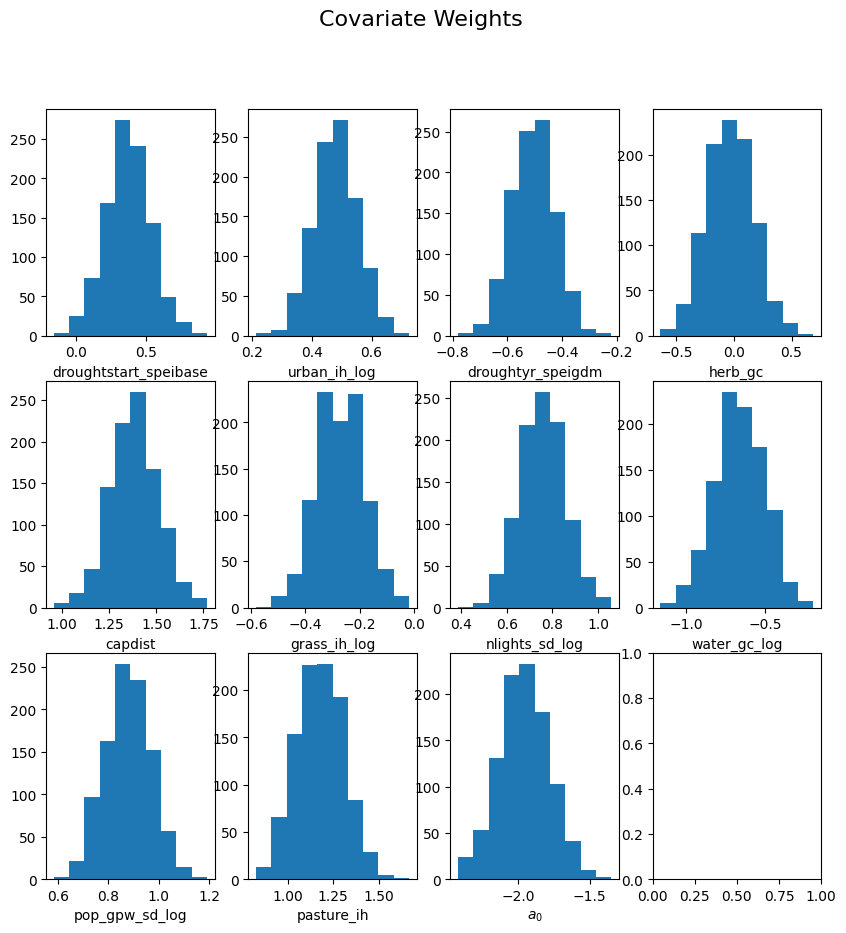

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,0.373405,0.161113,2.317653,2.046819e-02,0.057011,0.703284
urban_ih_log,0.479500,0.073922,6.486544,8.782786e-11,0.331808,0.627295
droughtyr_speigdm,-0.505623,0.079117,-6.390830,1.649879e-10,-0.663275,-0.355975
herb_gc,-0.030837,0.201992,-0.152663,8.786644e-01,-0.411064,0.376488
capdist,1.381603,0.127785,10.811926,0.000000e+00,1.129774,1.647237
grass_ih_log,-0.271024,0.088124,-3.075470,2.101713e-03,-0.444335,-0.092675
nlights_sd_log,0.756320,0.100294,7.541027,4.662937e-14,0.565591,0.958558
water_gc_log,-0.662226,0.159657,-4.147809,3.356729e-05,-0.988063,-0.361139
pop_gpw_sd_log,0.877876,0.091628,9.580894,0.000000e+00,0.706003,1.053034
pasture_ih,1.178392,0.128772,9.150981,0.000000e+00,0.932398,1.431813


In [16]:
model.cov_weight_post_summary()

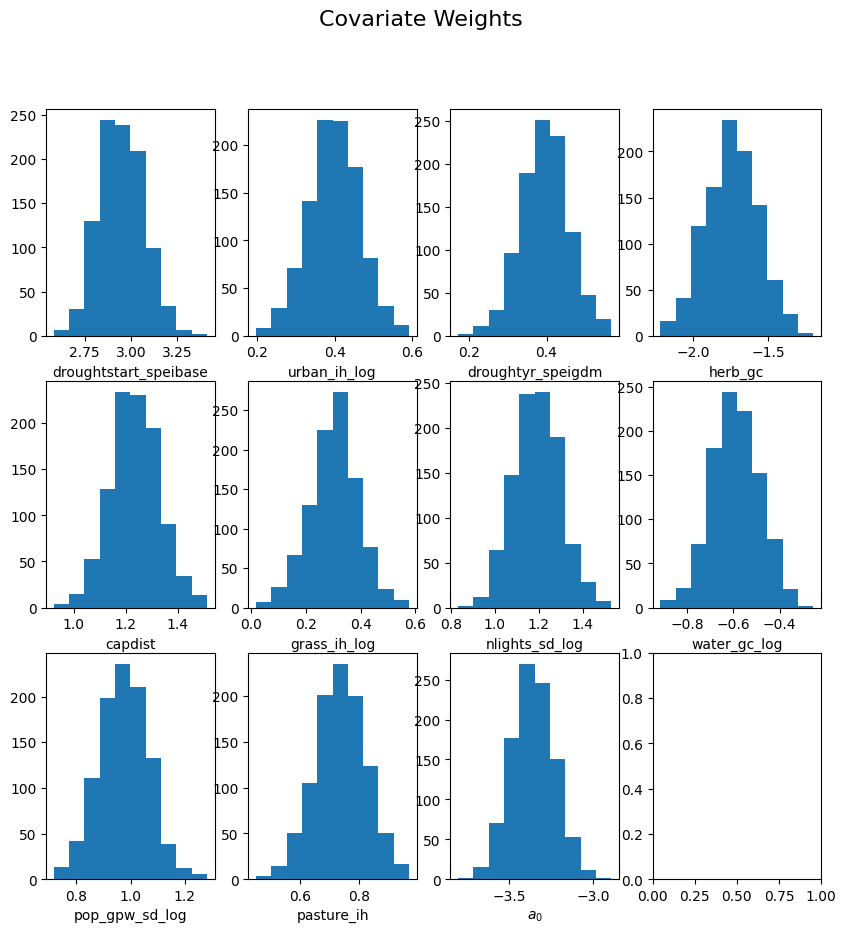

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,2.949683,0.120087,24.562891,0.000000e+00,2.733768,3.187311
urban_ih_log,0.397864,0.066037,6.024894,1.692205e-09,0.262067,0.523657
droughtyr_speigdm,0.395843,0.061906,6.394277,1.613094e-10,0.273627,0.517827
herb_gc,-1.741336,0.173184,-10.054826,0.000000e+00,-2.082156,-1.390765
capdist,1.235065,0.093889,13.154537,0.000000e+00,1.055389,1.432756
grass_ih_log,0.302409,0.089205,3.390056,6.987840e-04,0.114571,0.477479
nlights_sd_log,1.193461,0.106311,11.226171,0.000000e+00,0.994698,1.409995
water_gc_log,-0.590039,0.104907,-5.624393,1.861613e-08,-0.794097,-0.392240
pop_gpw_sd_log,0.975228,0.091300,10.681623,0.000000e+00,0.794920,1.149897
pasture_ih,0.735985,0.085898,8.568151,0.000000e+00,0.563680,0.903153


In [25]:
model.cov_weight_post_summary()